In [ ]:
#LTFS datahack submisson by shubham chauhan

In [78]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
%cd ./drive/My Drive/Data

[Errno 2] No such file or directory: './drive/My Drive/Data'
/content/drive/My Drive/Data


In [0]:
#import data
import pandas as pd
import numpy as np
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [82]:
pd.set_option('display.max_columns', None)
train_data.head(10)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
5,518279,54513,61900,89.66,67,22807,45,1501,08-09-90,Self employed,19-09-18,6,1998,1,1,0,0,0,0,825,A-Very Low Risk,2,0,0,0,0,0,0,0,0,0,0,0,1347,0,0,0,1yrs 9mon,2yrs 0mon,0,0
6,529269,46349,61500,76.42,67,22807,45,1502,01-06-88,Salaried,23-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
7,510278,43894,61900,71.89,67,22807,45,1501,04-10-89,Salaried,16-09-18,6,1998,1,1,0,0,0,0,17,Not Scored: Not Enough Info available on the c...,1,1,0,72879,74500,74500,0,0,0,0,0,0,0,0,0,0,0yrs 2mon,0yrs 2mon,0,0
8,490213,53713,61973,89.56,67,22807,45,1497,15-11-91,Self employed,05-09-18,6,1998,1,1,0,0,0,0,718,D-Very Low Risk,1,1,0,-41,365384,365384,0,0,0,0,0,0,0,0,0,0,4yrs 8mon,4yrs 8mon,1,0
9,510980,52603,61300,86.95,67,22807,45,1492,01-06-68,Salaried,16-09-18,6,1998,1,0,0,1,0,0,818,A-Very Low Risk,1,0,0,0,0,0,0,0,0,0,0,0,2608,0,0,0,1yrs 7mon,1yrs 7mon,0,0


In [0]:
#train_data.info()

#### Data cleaning

In [0]:

# converting date of birth to age and Disbursal date to no. of years since disbursal date
now = pd.Timestamp('now')
def to_years(df):
    df['Date.of.Birth']= pd.to_datetime(df['Date.of.Birth'])
    df['DisbursalDate']= pd.to_datetime(df['DisbursalDate'])
    df['Date.of.Birth'] = df['Date.of.Birth'].mask(df['Date.of.Birth'].dt.year > 2019, 
                                         df['Date.of.Birth'] - pd.offsets.DateOffset(years=100))
    df['DisbursalDate'] = df['DisbursalDate'].mask(df['DisbursalDate'].dt.year > 2019, 
                                         df['DisbursalDate'] - pd.offsets.DateOffset(years=100))
    
    #converting date of birth to age
    
    df['Date.of.Birth'] = pd.to_datetime(df['Date.of.Birth'], format='%m%d%y')    # 1
    df['Date.of.Birth'] = df['Date.of.Birth'].where(df['Date.of.Birth'] < now, df['Date.of.Birth'] -  np.timedelta64(100, 'Y'))   # 2
    df['age'] = (now - df['Date.of.Birth']).astype('<m8[Y]').astype(int)
    
    df['DisbursalDate'] = pd.to_datetime(df['DisbursalDate'], format='%m%d%y')    # 1
    df['DisbursalDate'] = df['DisbursalDate'].where(df['DisbursalDate'] < now, df['DisbursalDate'] -  np.timedelta64(100, 'Y'))   # 2
    df['years since disbursal'] = (now - df['DisbursalDate']).astype('<m8[Y]').astype(int)
    
    return df

train_data = to_years(train_data)
test_data = to_years(test_data)

    



In [85]:
train_data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,age,years since disbursal
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,2018-03-08,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,35,1
1,537409,47145,65550,73.23,67,22807,45,1502,1985-07-31,Self employed,2018-09-26,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1,33,0
2,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,2018-01-08,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,33,1
3,624493,57513,66113,88.48,67,22807,45,1501,1993-12-30,Self employed,2018-10-26,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1,25,0
4,539055,52378,60300,88.39,67,22807,45,1495,1977-09-12,Self employed,2018-09-26,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1,41,0


In [0]:
#checking for missing values
#train_data.isnull().sum()

In [0]:
#test_data.isnull().sum()

In [88]:
# taking a look at the data with missing values
train_data[train_data['Employment.Type'].isna()].loan_default.value_counts()

0    6017
1    1644
Name: loan_default, dtype: int64

#### Missing values treatment

In [0]:
# filling up missing values in employment type with 'unemployed' 
train_data['Employment.Type'].fillna('unemployed', inplace = True)
test_data['Employment.Type'].fillna('unemployed', inplace = True)

In [90]:
# taking a look at objects columns 

for col in train_data.drop('loan_default', axis = 1).columns:
    if train_data[col].dtype =='object' or train_data[col].nunique() < 10:
        xx=train_data.groupby(col)['loan_default'].value_counts().unstack(1)
        display(xx)

loan_default,0,1
Employment.Type,,
Salaried,77948,19910
Self employed,98578,29057
unemployed,6017,1644


loan_default,0,1
MobileNo_Avl_Flag,,
1,182543,50611


loan_default,0,1
Aadhar_flag,,
0,27684,9546
1,154859,41065


loan_default,0,1
PAN_flag,,
0,168799,46734
1,13744,3877


loan_default,0,1
VoterID_flag,,
0,157565,41795
1,24978,8816


loan_default,0,1
Driving_flag,,
0,178216,49519
1,4327,1092


loan_default,0,1
Passport_flag,,
0,182121,50537
1,422,74


loan_default,0,1
PERFORM_CNS.SCORE.DESCRIPTION,,
A-Very Low Risk,11783.0,2341.0
B-Very Low Risk,7993.0,1208.0
C-Very Low Risk,13275.0,2770.0
D-Very Low Risk,9659.0,1699.0
E-Low Risk,4821.0,1000.0
F-Low Risk,6905.0,1580.0
G-Low Risk,3202.0,786.0
H-Medium Risk,5197.0,1658.0
I-Medium Risk,4042.0,1515.0


loan_default,0,1
SEC.OVERDUE.ACCTS,,
0,181476.0,50341.0
1,910.0,219.0
2,93.0,33.0
3,36.0,11.0
4,16.0,3.0
5,6.0,2.0
6,4.0,2.0
7,1.0,NaN
8,1.0,NaN


loan_default,0,1
AVERAGE.ACCT.AGE,,
0yrs 0mon,91716.0,27657.0
0yrs 10mon,4161.0,982.0
0yrs 11mon,4187.0,1050.0
0yrs 1mon,1679.0,528.0
0yrs 2mon,2295.0,638.0
0yrs 3mon,2761.0,809.0
0yrs 4mon,3382.0,887.0
0yrs 5mon,3518.0,836.0
0yrs 6mon,4842.0,1186.0


loan_default,0,1
CREDIT.HISTORY.LENGTH,,
0yrs 0mon,91555.0,27572.0
0yrs 10mon,1912.0,455.0
0yrs 11mon,2083.0,544.0
0yrs 1mon,1393.0,460.0
0yrs 2mon,1545.0,432.0
0yrs 3mon,1570.0,412.0
0yrs 4mon,1683.0,460.0
0yrs 5mon,1644.0,442.0
0yrs 6mon,3761.0,1000.0


loan_default,0,1
years since disbursal,,
0,173474,48172
1,9069,2439


In [0]:
# creating function for extracting month from the date

import re 
  
def extractmonth(x):
    numbers = re.findall('\d+',x)
    numbers = list(map(int,numbers))
    x = numbers[0]*12 + numbers[1]
    return x

train_data['AVERAGE.ACCT.AGE_MON'] = train_data['AVERAGE.ACCT.AGE'].apply(extractmonth)
test_data['AVERAGE.ACCT.AGE_MON'] = test_data['AVERAGE.ACCT.AGE'].apply(extractmonth)

train_data['CREDIT.HISTORY.LENGTH_MON'] = train_data['CREDIT.HISTORY.LENGTH'].apply(extractmonth)
test_data['CREDIT.HISTORY.LENGTH_MON'] = test_data['CREDIT.HISTORY.LENGTH'].apply(extractmonth)

In [92]:
train_data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,age,years since disbursal,AVERAGE.ACCT.AGE_MON,CREDIT.HISTORY.LENGTH_MON
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,2018-03-08,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,35,1,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,1985-07-31,Self employed,2018-09-26,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1,33,0,23,23
2,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,2018-01-08,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,33,1,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,1993-12-30,Self employed,2018-10-26,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1,25,0,8,15
4,539055,52378,60300,88.39,67,22807,45,1495,1977-09-12,Self employed,2018-09-26,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1,41,0,0,0


### Encoding categorical variables

In [0]:
from sklearn.preprocessing import LabelEncoder
# encodings for bureau score(perform cns score distribution)
def perform(data):
    data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('No Bureau History Available', 0)
    data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Sufficient History Not Available', 0)
    data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Not Enough Info available on the customer', 0)
    data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: No Activity seen on the customer (Inactive)',0)
    data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: No Updates available in last 36 months', 0)
    data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Only a Guarantor', 0)
    data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: More than 50 active Accounts found',0)
    data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('M-Very High Risk', 1)
    data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('L-Very High Risk', 1)
    data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('K-High Risk', 2)
    data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('J-High Risk', 2)
    data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('I-Medium Risk', 3)
    data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('H-Medium Risk', 3)
    data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('G-Low Risk', 4)
    data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('F-Low Risk', 4)
    data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('E-Low Risk', 4)
    data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('D-Very Low Risk', 5)
    data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('C-Very Low Risk', 5)
    data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('B-Very Low Risk', 5)
    data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('A-Very Low Risk', 5)
    
    # some attributes are categorical but they are in integer so let's convert them into category

    #data['branch_id'] = data['branch_id'].astype('category')
    #data['manufacturer_id'] = data['manufacturer_id'].astype('category')
    #data['State_ID'] = data['State_ID'].astype('category')

    

    le = LabelEncoder()
    data['branch_id'] = le.fit_transform(data['branch_id'])
    data['manufacturer_id'] = le.fit_transform(data['manufacturer_id'])
    data['State_ID'] = le.fit_transform(data['State_ID'])
    data['supplier_id'] = le.fit_transform(data['supplier_id'])
    
   
    return data

train_data = perform(train_data)
test_data = perform(test_data)

    



In [0]:
# one_hot_encoding the categorical variables

train_data = pd.get_dummies(train_data, columns = ['Employment.Type'])
test_data = pd.get_dummies(test_data, columns = ['Employment.Type'])

In [95]:
#train_data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,age,years since disbursal,AVERAGE.ACCT.AGE_MON,CREDIT.HISTORY.LENGTH_MON,Employment.Type_Salaried,Employment.Type_Self employed,Employment.Type_unemployed
0,420825,50578,58400,89.55,30,1415,0,1441,1984-01-01,2018-03-08,5,1998,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,35,1,0,0,1,0,0
1,537409,47145,65550,73.23,30,1415,0,1502,1985-07-31,2018-09-26,5,1998,1,1,0,0,0,0,598,3,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1,33,0,23,23,0,1,0
2,417566,53278,61360,89.63,30,1415,0,1497,1985-08-24,2018-01-08,5,1998,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,33,1,0,0,0,1,0
3,624493,57513,66113,88.48,30,1415,0,1501,1993-12-30,2018-10-26,5,1998,1,1,0,0,0,0,305,1,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1,25,0,8,15,0,1,0
4,539055,52378,60300,88.39,30,1415,0,1495,1977-09-12,2018-09-26,5,1998,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1,41,0,0,0,0,1,0


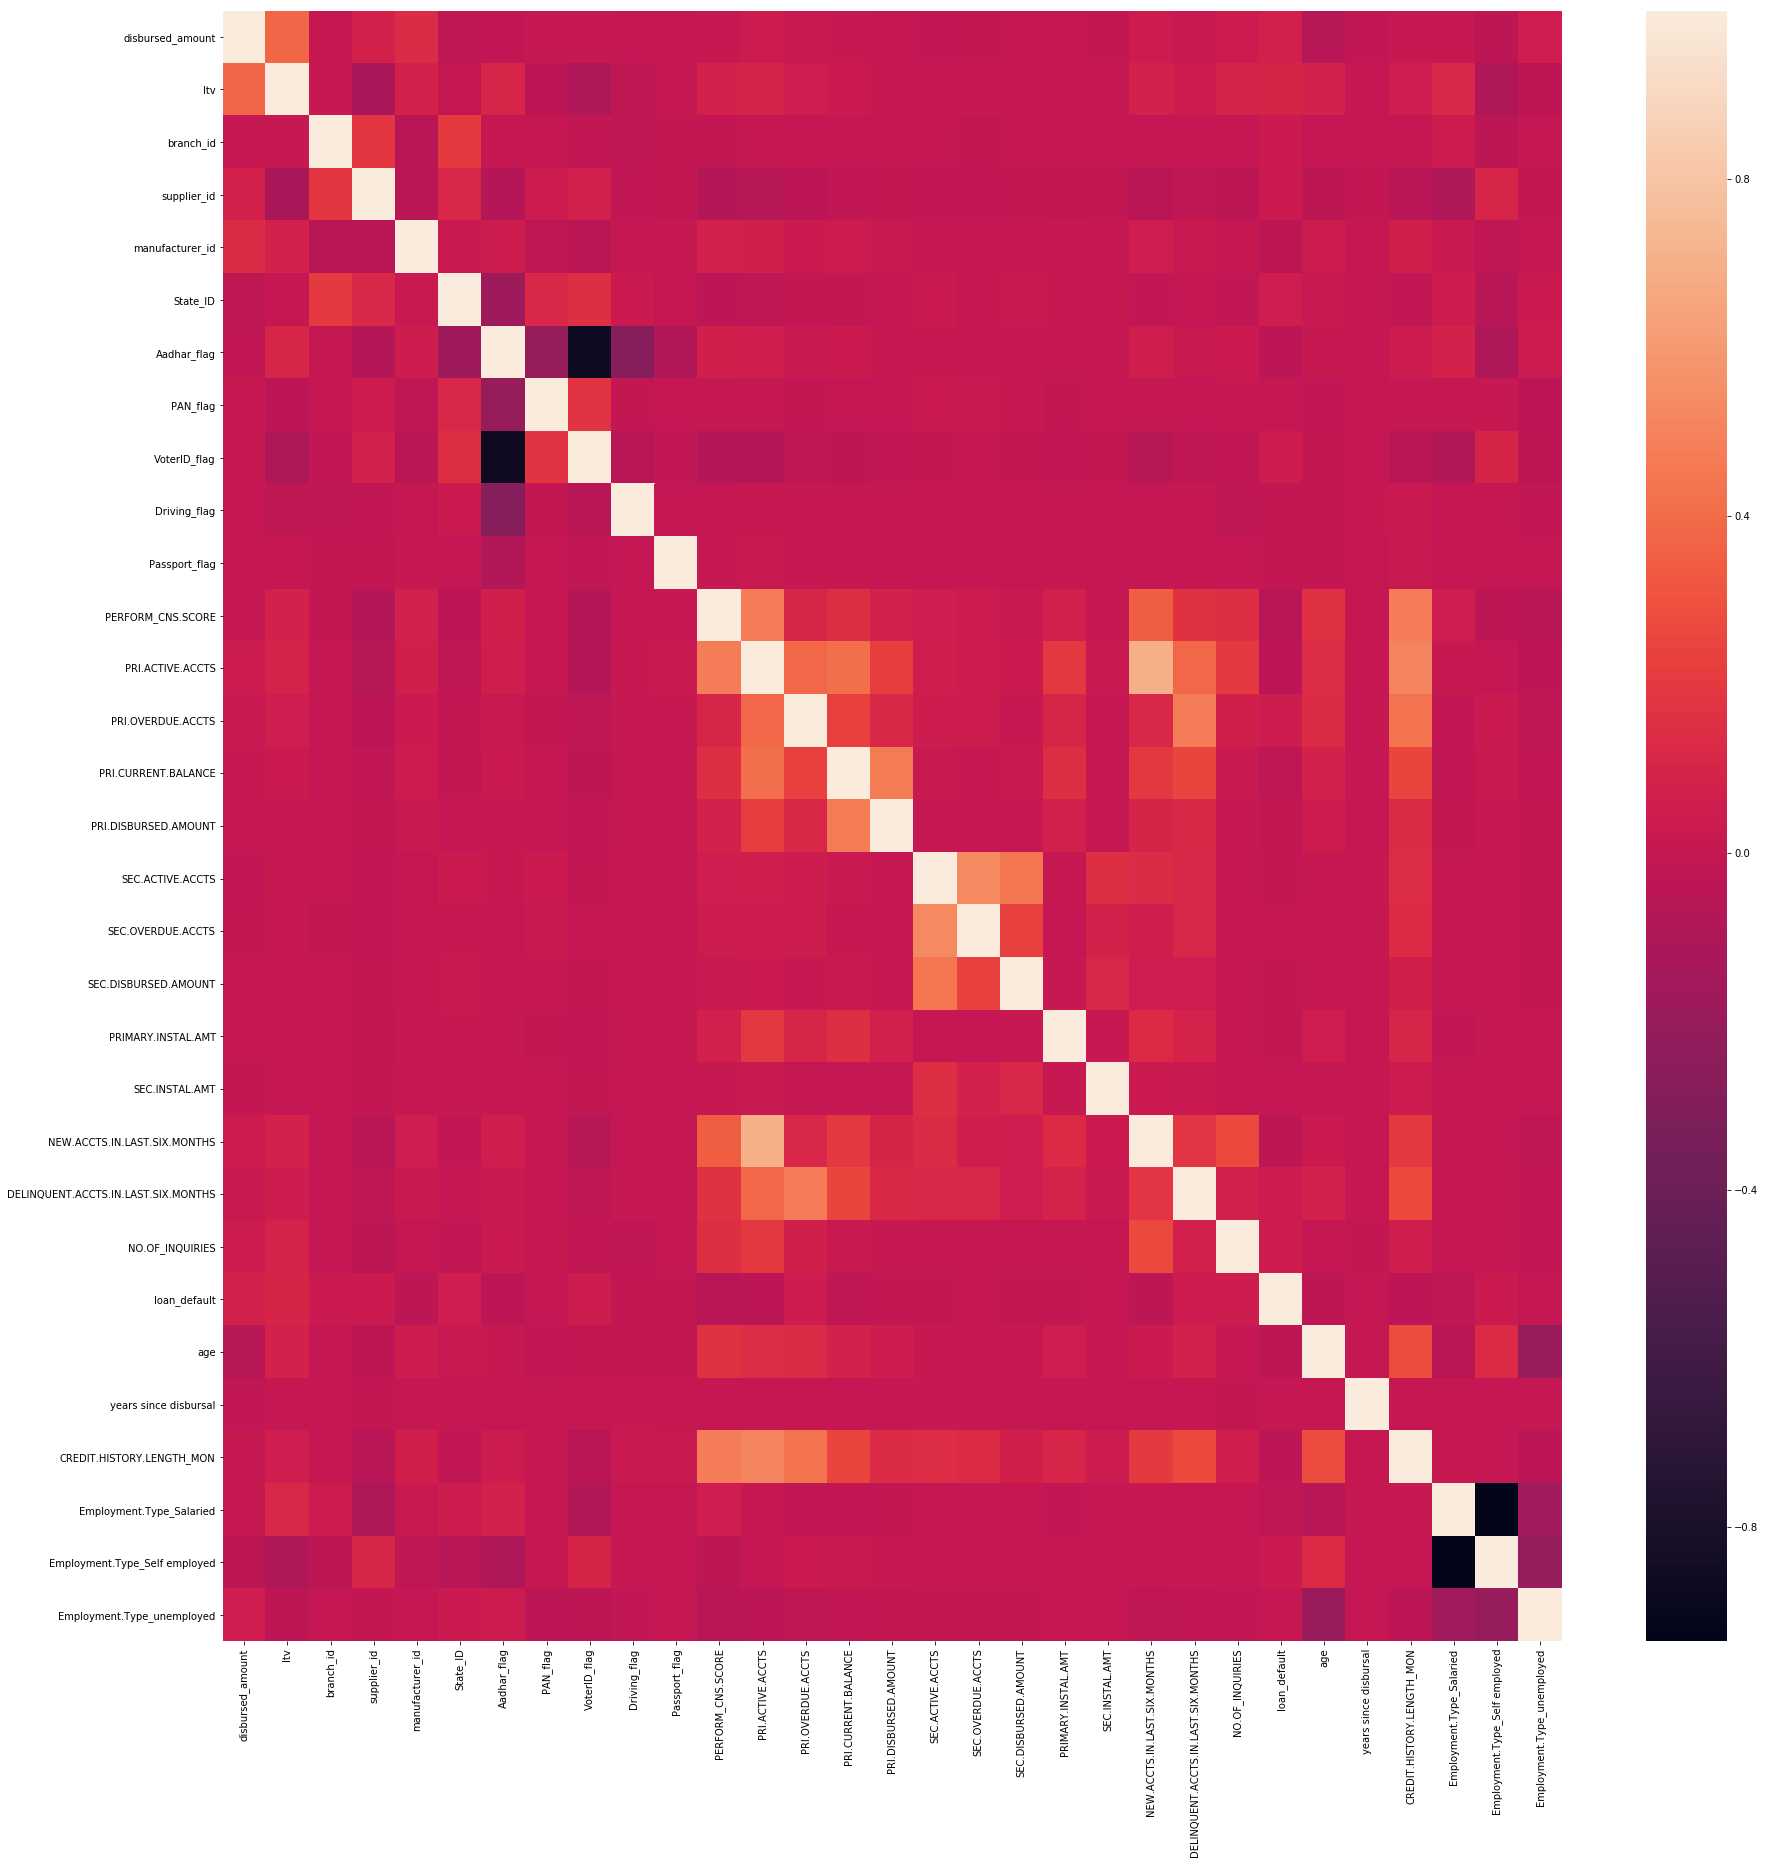

In [96]:
# working on correaltion
df = train_data.copy()
df.drop(['Date.of.Birth', 'DisbursalDate', 'UniqueID', 'Current_pincode_ID', 'Employee_code_ID', 'AVERAGE.ACCT.AGE'
                      , 'CREDIT.HISTORY.LENGTH', 'MobileNo_Avl_Flag', 'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS'
         , 'PRI.SANCTIONED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.SANCTIONED.AMOUNT', 'SEC.CURRENT.BALANCE', 'AVERAGE.ACCT.AGE_MON', 'asset_cost'], axis = 1, inplace = True)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(30, 30))
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [0]:
# getting the target variable

target = train_data['loan_default']
train = df.copy()
test = test_data.copy()

# dropping corealted and useless columns
train.drop(['loan_default'], axis = 1, inplace = True)
test.drop(['Date.of.Birth', 'DisbursalDate', 'UniqueID', 'Current_pincode_ID', 'Employee_code_ID', 'AVERAGE.ACCT.AGE'
                      , 'CREDIT.HISTORY.LENGTH', 'MobileNo_Avl_Flag', 'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS'
         , 'PRI.SANCTIONED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.SANCTIONED.AMOUNT', 'SEC.CURRENT.BALANCE', 'AVERAGE.ACCT.AGE_MON', 'asset_cost'], axis = 1, inplace = True)


In [98]:
test.head()

,disbursed_amount,ltv,branch_id,supplier_id,manufacturer_id,State_ID,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.DISBURSED.AMOUNT,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,age,years since disbursal,CREDIT.HISTORY.LENGTH_MON,Employment.Type_Salaried,Employment.Type_Self employed,Employment.Type_unemployed
0,53478,86.54,30,1345,0,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,1,0,1,0,0
1,55513,89.45,30,1345,0,5,1,0,0,0,0,749,1,0,43898,48780,0,0,0,5605,0,1,0,1,33,0,12,0,1,0
2,65282,79.93,39,1566,5,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,0,0,1,0,0
3,46905,76.58,39,518,0,3,1,0,0,0,0,14,1,1,132480,255000,0,0,0,0,0,0,0,0,46,0,29,0,1,0
4,51428,86.08,39,518,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,47,0,0,1,0,0


In [99]:
train.head()

,disbursed_amount,ltv,branch_id,supplier_id,manufacturer_id,State_ID,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.DISBURSED.AMOUNT,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,age,years since disbursal,CREDIT.HISTORY.LENGTH_MON,Employment.Type_Salaried,Employment.Type_Self employed,Employment.Type_unemployed
0,50578,89.55,30,1415,0,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,1,0,1,0,0
1,47145,73.23,30,1415,0,5,1,0,0,0,0,598,1,1,27600,50200,0,0,0,1991,0,0,1,0,33,0,23,0,1,0
2,53278,89.63,30,1415,0,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33,1,0,0,1,0
3,57513,88.48,30,1415,0,5,1,0,0,0,0,305,0,0,0,0,0,0,0,31,0,0,0,1,25,0,15,0,1,0
4,52378,88.39,30,1415,0,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,41,0,0,0,1,0


In [0]:
#train = train[['disbursed_amount', 'ltv', 'age', 'supplier_id']]
#test = test[['disbursed_amount', 'ltv', 'age', 'supplier_id']]

In [0]:
# sampling
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
ros = RandomOverSampler(random_state=777)
X_ROS, y_ROS = ros.fit_sample(train, target)

In [102]:
# splitting data into training and validation set
from sklearn.model_selection import train_test_split

train_x, val_x, train_y, val_y = train_test_split(X_ROS, y_ROS, test_size = 0.3, random_state = 12)

print(' train_x shape is ', train_x.shape, ' train_y shape is ', train_y.shape )
print(' val_x shape is ', val_x.shape, ' val_y shape is ', val_y.shape )

 train_x shape is  (255560, 30)  train_y shape is  (255560,)
 val_x shape is  (109526, 30)  val_y shape is  (109526,)


In [103]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
train_x = sc.fit_transform(train_x)
val_x = sc.transform(val_x)
test = sc.transform(test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


### Building Model

In [106]:
import lightgbm as lgb
from keras.callbacks import EarlyStopping

#Initializing the lgb model
lgb_model = lgb.LGBMClassifier(objective='binary')


#cross validation score
f1_score = cross_val_score(lgb_model, train_x, train_y, cv=5, scoring='f1',n_jobs=3)
print(f1_score,"Mean = ",np.mean(f1_score))

#early stopping
estop = EarlyStopping(patience=10, mode='min', min_delta=0.001, monitor='val_acc')

#fitting model on train data set
lgb_model.fit(train_x, train_y, eval_set=[(val_x,val_y)], eval_metric='auc', early_stopping_rounds= [estop])

#prediting on validation set
pred_y = lgb_model.predict(val_x)

[0.6453005  0.64065955 0.64316423 0.64280363 0.64361144] Mean =  0.6431078687808596
[1]	valid_0's auc: 0.623465	valid_0's binary_logloss: 0.688439
Training until validation scores don't improve for [<keras.callbacks.EarlyStopping object at 0x7f7b0f346668>] rounds.
[2]	valid_0's auc: 0.627266	valid_0's binary_logloss: 0.684573
[3]	valid_0's auc: 0.631184	valid_0's binary_logloss: 0.681302
[4]	valid_0's auc: 0.632722	valid_0's binary_logloss: 0.678476
[5]	valid_0's auc: 0.633988	valid_0's binary_logloss: 0.67615
[6]	valid_0's auc: 0.635273	valid_0's binary_logloss: 0.674174
[7]	valid_0's auc: 0.6367	valid_0's binary_logloss: 0.672376
[8]	valid_0's auc: 0.637893	valid_0's binary_logloss: 0.670803
[9]	valid_0's auc: 0.639199	valid_0's binary_logloss: 0.669317
[10]	valid_0's auc: 0.640272	valid_0's binary_logloss: 0.668066
[11]	valid_0's auc: 0.641654	valid_0's binary_logloss: 0.666929
[12]	valid_0's auc: 0.642798	valid_0's binary_logloss: 0.66583
[13]	valid_0's auc: 0.643664	valid_0's bina

              precision    recall  f1-score   support

           0       0.64      0.58      0.61     54609
           1       0.62      0.67      0.64     54917

   micro avg       0.63      0.63      0.63    109526
   macro avg       0.63      0.63      0.63    109526
weighted avg       0.63      0.63      0.63    109526

AUC: 0.627


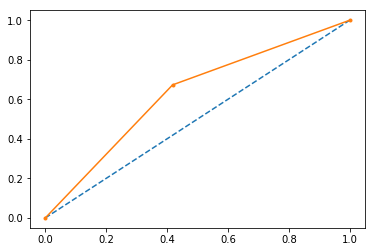

In [109]:
from sklearn.metrics import classification_report
report = classification_report(val_y, pred_y)
print(report)
auc = roc_auc_score(val_y, pred_y)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(val_y, pred_y)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [108]:
confusion_matrix(val_y, pred_y)

array([[31767, 22842],
       [17955, 36962]])

In [0]:
# making prediction on test data
pred = lgb_model.predict(test)
sub = pd.DataFrame({'UniqueID': test_data.UniqueID, 'loan_default':pred})

#creating submission file
sub.to_csv('sub_lgb.csv', index = False)